#### Dette er en test! 15:37

# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.


First some practical information:

* When is the assignment due?: **23:59, Friday, August 14, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group**.

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. Do not submit your answers as a pdf. Do not convert the notebook to json and then submit that etc. :) 

## Problems from Exercise Set 3:

> **Ex. 3.2.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). Write _three sentences_ for this question. 
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.

In [45]:
# Importing packages & data

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

In [41]:
# Ex. 3.2.1

# As seen below, the dataset contains various information about the passengers on Titanic, including the passenger's
# sex, age, travel class, "survival status" etc. The data is stored in a pandas DataFrame and contains both integers,
# floats, strings (object), categorical variables and boolean values.

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

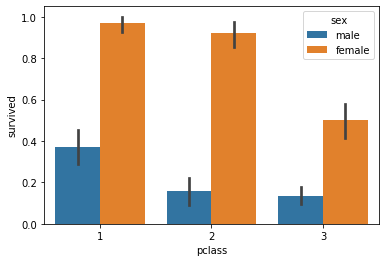

In [43]:
# Probability of survival, barplot

sns.barplot(x='pclass', y='survived', data=titanic, hue='sex')

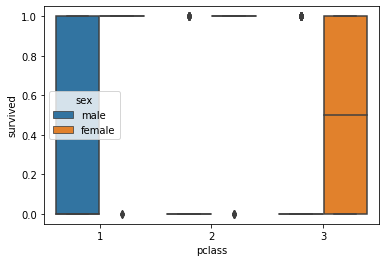

In [44]:
# Probability of survival, boxplot

sns.boxplot(x='pclass', y='survived', data=titanic, hue='sex')

# A boxplot does not work, since it cannot show the same information. For example, it is not able to apply the 'sex'
# dimension, thereby failing to show the differences in survival rate for each sex (which is the main purpose) of
# the plot). Also, it is not relevant to show the miniumum and maximum range of the survival variable. It is only possible by using several boxplots six in this case.
#The plot below shows our points above.

> **Ex. 3.2.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels to `sepal length` and `sepal width`.
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

Text(0.5, 0, 'sepal width')

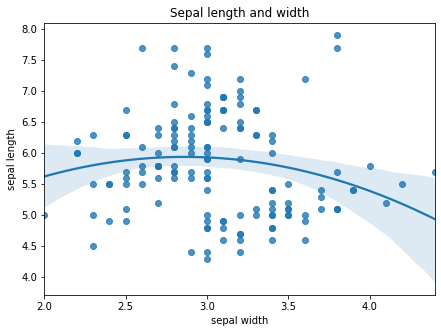

In [47]:
# Ex. 3.2.2
import seaborn as sns

fig, ax = plt.subplots(figsize = (7, 5))
sns.regplot(y='sepal_length', x='sepal_width', data=iris, scatter=True, order=2).set_title('Sepal length and width')
ax.set_ylabel('sepal length')
ax.set_xlabel('sepal width')
#It is obviously a legit idea to compare sepal length and width, however the plot does not seem to show any kind of correlation from a visual assessment.
#The plot allows the observer to verify whether a correlation is present so in that sense the display is meaningful.

> **Ex. 3.2.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file in this on your computer named `two_plots.png`. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

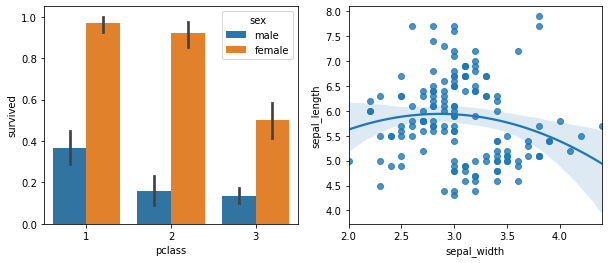

In [48]:
# 3.2.3

f, axes = plt.subplots(1, 2, figsize=(10,4))
sns.barplot(x='pclass', y='survived', data=titanic, hue='sex', ax=axes[0])
sns.regplot(y='sepal_length', x='sepal_width', data=iris, scatter=True, order=2, ax=axes[1])

plt.savefig('two_plots.png')

> **Ex. 3.2.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots

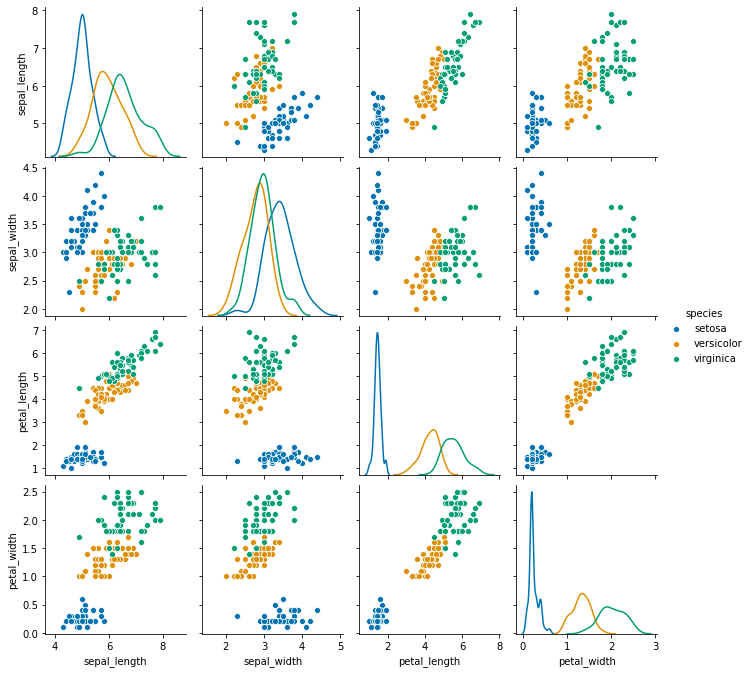

In [49]:
# 3.2.4

sns.pairplot(iris, height=2.3, hue='species', palette='colorblind', diag_kws=dict(shade=False)) 

## Problems from Exercise Set 4:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 4.1.1:** The code below runs through some of the steps we completed in exercise 4.1.1 in Module 4. As we are not going to request the website but load the data from a csv file your task is to **rewrite parts of the function**. Rename the function to `process_weather` instead of `load_weather`. The function should now  take a `dataframe` as input. The function should still run through the same processing steps although you should consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The doc string should also be rewritten. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `load_weather` function  to this dataframe and store the result in the variable `df_weather_period`.   

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [50]:
# YOUR CODE HERE
import pandas as pd
def process_weather(x):
    COLS=["station", "datetime", "obs_type", "obs_value"]
    x.columns=COLS
    df_out=x.query("obs_type == 'TMAX'")
    df_out1=df_out.copy()

    df_out1['obs_value'] =df_out['obs_value']/10
   # df_out.assign(obs_value=lambda x: x['obs_value']/10)
    df_out1.sort_values(by=['station', 'datetime']).reset_index(drop=True)
    df_out1.reset_index(drop=True, inplace=True)

    # area process
    df_out1['area'] = df_out1['station'].str[0:2]

    # datetime process
    df_out1['datetime_dt'] = pd.to_datetime(df_out1['datetime'], format = '%Y%m%d')
    df_out1['month'] = df_out1['datetime_dt'].dt.month
    df_out1['year'] = df_out1['datetime_dt'].dt.year

    return df_out1

df_weather_period=process_weather(pd.read_csv('weather_data_1870-1875.csv'))

In [51]:
assert any(df_weather_period.station == process_weather(pd.read_csv('weather_data_1870-1875.csv')).station)
assert any(df_weather_period.columns.values == ['station', 'datetime', 'obs_type', 'area', 
                                                'obs_value', 'datetime_dt', 'month', 'year'])
assert len(df_weather_period) == 132317
assert round(df_weather_period.obs_value.mean()) == 14

In [52]:
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00066062,18700101,TMAX,27.1,AS,1870-01-01,1,1870
1,ASN00074128,18700101,TMAX,41.1,AS,1870-01-01,1,1870
2,ASN00086071,18700101,TMAX,23.3,AS,1870-01-01,1,1870
3,ASN00090015,18700101,TMAX,20.0,AS,1870-01-01,1,1870
4,AU000005901,18700101,TMAX,-0.9,AU,1870-01-01,1,1870
...,...,...,...,...,...,...,...,...
132312,USW00023068,18751231,TMAX,2.2,US,1875-12-31,12,1875
132313,USW00024274,18751231,TMAX,12.2,US,1875-12-31,12,1875
132314,USW00093820,18751231,TMAX,21.7,US,1875-12-31,12,1875
132315,USW00093852,18751231,TMAX,25.6,US,1875-12-31,12,1875


> **Ex. 4.1.1.1 (Not seen in module 4):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these observations be characterized as? Drop these three observations from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

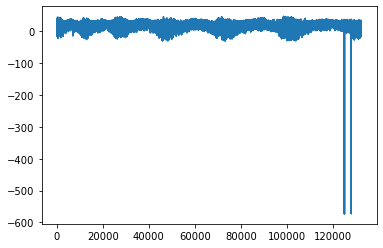

In [53]:
# YOUR CODE HERE
df_weather_period.obs_value.plot()
df_weather_period.query('obs_value<-50')
#These 3 observations are identical and equal to -573.3 which is most likely an error in the data
df_weather_period.drop([124932, 125026, 127945], inplace=True)
df_weather_period.reset_index(drop=True, inplace=True)

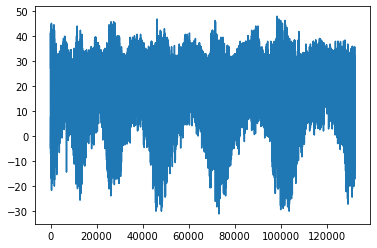

In [54]:
df_weather_period.obs_value.plot()

In [55]:
assert len(df_weather_period[df_weather_period.obs_value < -50]) == 0 

> **Ex. 4.1.3:** 
Continuing with the `df_weather_period` from last exercise, convert the `area` column to a categorical variable. 
Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. Call this new column for `obs_value_cat`.  This can be done using the `pd.cut()` method of pandas. 
Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.cut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [56]:
# YOUR CODE HERE
df_weather_period['area'].astype('category')
df_weather_period['obs_value_cat']=pd.cut(df_weather_period['obs_value'], 3)
df_weather_period['obs_value_cat_labeled']=pd.cut(df_weather_period['obs_value'],3, labels=["cold", "medium", "hot"])
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled
0,ASN00066062,18700101,TMAX,27.1,AS,1870-01-01,1,1870,"(21.5, 47.8]",hot
1,ASN00074128,18700101,TMAX,41.1,AS,1870-01-01,1,1870,"(21.5, 47.8]",hot
2,ASN00086071,18700101,TMAX,23.3,AS,1870-01-01,1,1870,"(21.5, 47.8]",hot
3,ASN00090015,18700101,TMAX,20.0,AS,1870-01-01,1,1870,"(-4.8, 21.5]",medium
4,AU000005901,18700101,TMAX,-0.9,AU,1870-01-01,1,1870,"(-4.8, 21.5]",medium
...,...,...,...,...,...,...,...,...,...,...
132309,USW00023068,18751231,TMAX,2.2,US,1875-12-31,12,1875,"(-4.8, 21.5]",medium
132310,USW00024274,18751231,TMAX,12.2,US,1875-12-31,12,1875,"(-4.8, 21.5]",medium
132311,USW00093820,18751231,TMAX,21.7,US,1875-12-31,12,1875,"(21.5, 47.8]",hot
132312,USW00093852,18751231,TMAX,25.6,US,1875-12-31,12,1875,"(21.5, 47.8]",hot


In [57]:
assert sorted(df_weather_period.obs_value_cat.value_counts()) == [7594, 38878, 85842]
assert sorted(df_weather_period.obs_value_cat_labeled.value_counts()) == [7594, 38878, 85842]

## Problems from Exercise Set 5:

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

> **Ex. 5.1.2:** Compute the mean maximum daily temperature for each month-year pair on the dataframe `df_weather_period` from last exercise by using the `groupby` and `mean` methods. Store the results in the variable `tmax_mean`. 

In [38]:
# years = range(1870, 1876)
# dfs = []

# for year in years: #Running a loop over the 6 years and plugs them into the function. 
#     df_weather = load_weather(year)
#     dfs.append(df_weather) #Adding a dfs into a list for each year

# df_weather_period = pd.concat(dfs, axis=0, sort=False) #Concatenating the dfs into a one big df

In [59]:
# [Answer to Ex. 5.1.2]
#df_weather_period['year_month'] = pd.to_datetime(df_weather_period['datetime']).dt.to_period('M') #Creating the YYYY-MM forat
#tmax_mean = df_weather_period.groupby('year_month')['obs_value'].mean() #Splitting into YYYY-MM, and for each period we find the mean of 'obs_value'
#tmax_mean.sum()
groupvar1=['year', 'month']
tmax_mean=df_weather_period.groupby(groupvar1)['obs_value'].mean()
tmax_mean

year  month
1870  1         6.237698
      2         5.341376
      3         7.628285
      4        15.563050
      5        19.785612
                 ...    
1875  8        23.911261
      9        19.877832
      10       14.059588
      11        7.062827
      12        5.001091
Name: obs_value, Length: 72, dtype: float64

In [60]:
tmax_mean.sum()

1016.8188547562293

In [61]:
assert round(tmax_mean.sum()) ==  1017

> **Ex. 5.1.3:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'ITE00100550'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures.

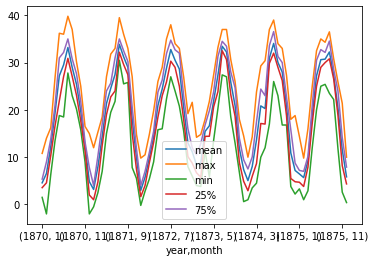

In [62]:
dfITE = df_weather_period.loc[df_weather_period['station'] == 'ITE00100550']
df2 = dfITE.groupby(groupvar1)['obs_value'].describe()[['mean','max','min','25%','75%']]
df2.plot(fig=(1000, 1000))

> **Ex. 5.1.4:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [63]:
# YOUR CODE HERE
#url="https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt" #if URL needs to be used instead of local file
locations = open("ghcnd-stations.txt", 'r') #opens the file
location_weather=pd.read_fwf(locations, names=['station', 'lat', 'lon', 'elevation','State', 'name', 'gsn flag', 'HCN/CRN flag', 'WMO ID'], index_col=False) #converts into pd, fwf = fixed width file
final_data=pd.merge(df_weather_period, location_weather, on='station',how='inner') #merging pds


In [64]:
assert round(final_data.lon.mean()) == -17 
assert round(final_data.lat.mean()) == 43
assert round(final_data.elevation.mean())  == 248

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [65]:
# Ex. 6.1.2

import requests
import json

In [66]:
# url = "https://job.jobnet.dk/CV/FindWork/Search"
# response = requests.get(url)
# d = json.loads(response.text)

# First 20 jobs
# d = pd.DataFrame(d['JobPositionPostings'][:20])
# d
import requests
import pandas as pd
import json
url1="https://job.jobnet.dk/CV/FindWork/Search"
jobnetdata=requests.get(url1)
d = json.loads(jobnetdata.text)
d


{'Expression': {'ShowNearbyCriteria': True,
  'Offset': 0,
  'Count': 20,
  'SearchString': None,
  'SortValue': None,
  'Id': [],
  'EarliestPublicationDate': '0001-01-01T00:00:00',
  'HotJob': False,
  'Abroad': False,
  'NearBy': None,
  'ExternalJob': None,
  'WorkPlaceNotStatic': None,
  'WorkHourMin': None,
  'WorkHourMax': None,
  'OnlyGeoPoints': False,
  'Facets': {'Region': [],
   'Country': [],
   'Municipality': [],
   'PostalCode': [],
   'OccupationAreas': [],
   'OccupationGroups': [],
   'Occupations': [],
   'EmploymentType': [],
   'WorkHours': [],
   'WorkHourPartTime': [],
   'JobAnnouncementType': [],
   'WorkPlaceNotStatic': []},
  'LocatedIn': None,
  'LocationZip': None,
  'Location': None,
  'SearchInGeoDistance': 0},
 'Facets': {'Region': [{'Id': 0,
    'Value': 'Hovedstaden og Bornholm',
    'Count': 5086},
   {'Id': 0, 'Value': 'Midtjylland', 'Count': 3232},
   {'Id': 0, 'Value': 'Syddanmark', 'Count': 2633},
   {'Id': 0, 'Value': 'Øvrige Sjælland', 'Count':

In [67]:
assert sorted(d.keys()) == ['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount']

> **Ex. 6.1.3.:** Create a dataframe named `df` from the 'JobPositionPostings' field in the json object from the previous exercise.  

In [68]:
# Ex. 6.1.3.
#df = d
# df = pd.DataFrame(d['JobPositionPostings'][:20])
df=pd.DataFrame(d['JobPositionPostings'][:20])

In [69]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

## Problems from Exercise Set 8

> **Ex. 8.1.2:** From exercise 8.1.1 in Module 8 we found that the company `euphemia media` owns the domain "netbaby.dk". Now we want to gather further information about this company.

> Go to the Central Business Register website https://datacvr.virk.dk/data/. Figure out how to look up companies by changing the url and then lookup `euphemia media`. Use `requests` to get the html and parse this with `BeautifulSoup`. Store the parsed html in the variable `soup`. Find the CVR number in the `soup`, store this in the variable `cvr` and finally print this variable.

In [70]:
# YOUR CODE HERE
import requests
from bs4 import BeautifulSoup

url="https://datacvr.virk.dk/data/visenhed?enhedstype=virksomhed&id=21848875&soeg=euphemia%20media&type=virksomhed&sortering=default&language=da"
response1=requests.get(url)
soup=BeautifulSoup(response1.text, 'lxml')
cvr=soup.find('div', {"class": "col-sm-6 cvrreg"}).text[1:].strip()

In [71]:
import bs4; type(soup) == bs4.BeautifulSoup
assert str(cvr) == '21848875'